Ref:
1. crop with cv2 or pil
    https://www.askpython.com/python/examples/crop-an-image-in-python

In [5]:
import os
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gp
import descartes

## crop the gray scale image and save

In [6]:
file_list = sorted(os.listdir('./satellite-hd-10min'))
for i in file_list:
    if i != '.ipynb_checkpoints':
        path = os.path.join('./satellite-hd-10min', i)
        img = cv2.imread(path)

        # convert RGB to gray scale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Crop the image
        ## trial&error for the slicing index
        top, bottom, left, right = 285, 485, 266, 421
        img_crop = img[top:bottom, left:right]
        #print(img_crop.shape)
        
        name = re.search(r'\d{4}_\d{2}_\d{2}_\d{2}', i).group()
        # save the crop image
        cv2.imwrite(f"./CropCloud/{name}.png", img_crop)

## match the contour 

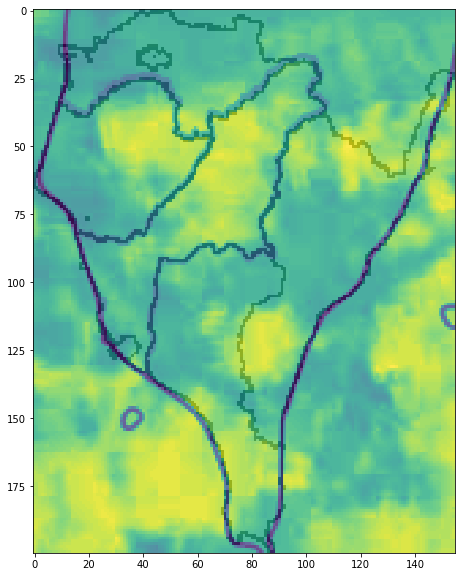

In [3]:
# match with the taiwan_contour
taiwan_contour = cv2.imread(r"./taiwan_contour.png")

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
#ax.set_xticks(np.arange(0, img_crop.shape[-1], 5))
#ax.set_yticks(np.arange(0,img_crop.shape[0], 5))
#plt.grid()

plt.imshow(img_crop, zorder = 1)
plt.imshow(taiwan_contour, alpha = 0.2, zorder=2)

plt.show()